In [141]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [67]:
data = pd.read_csv("world-happiness-report-2021.csv")

In [129]:
data.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,label_kmeans,Ladder score 2,Logged GDP per capita 2
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,1.446,1.106,0.741,0.691,0.124,0.481,3.253,1,1.0,1.0
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,1.502,1.108,0.763,0.686,0.208,0.485,2.868,1,1.0,1.0
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,1.566,1.079,0.816,0.653,0.204,0.413,2.839,1,1.0,1.0
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,1.482,1.172,0.772,0.698,0.293,0.170,2.967,1,1.0,1.0
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,1.501,1.079,0.753,0.647,0.302,0.384,2.798,1,1.0,1.0
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,...,1.543,1.108,0.782,0.703,0.249,0.427,2.580,1,1.0,1.0
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,...,1.478,1.062,0.763,0.685,0.244,0.448,2.683,1,1.0,1.0
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,...,1.751,1.003,0.760,0.639,0.166,0.353,2.653,1,1.0,1.0
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,...,1.400,1.094,0.785,0.665,0.276,0.445,2.612,1,1.0,1.0
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,...,1.492,1.062,0.782,0.640,0.215,0.292,2.784,1,1.0,1.0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [69]:
data.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [70]:
data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [71]:
data_na=data[data.isna().any(axis=1)]
data_na

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual


<AxesSubplot:>

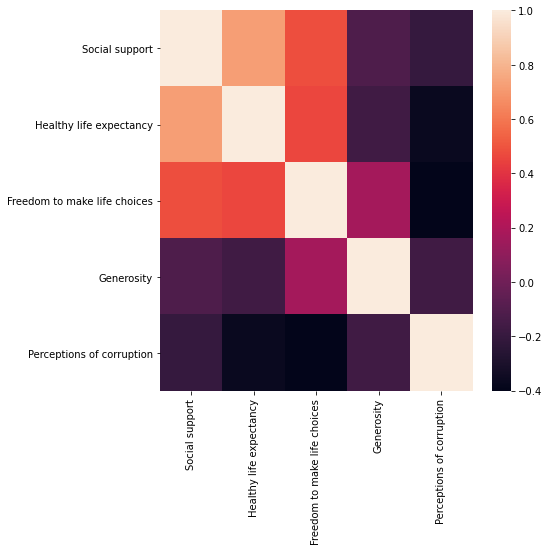

In [110]:
features=['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
cor=data.loc[:,features].corr()

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(ax=ax, data=cor)

In [73]:
cor

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


In [74]:
x = data.loc[:, features].values
x_scaler = StandardScaler().fit_transform(x)

In [75]:
kmeans = KMeans(n_clusters=5).fit(data[features])
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(data[features])

[[ 4.41938462e+00  8.07088462e+00  7.02500000e-01  5.71636154e+01
   7.22192308e-01  6.11538462e-02  7.64923077e-01]
 [ 6.73961765e+00  1.07301471e+01  9.12176471e-01  7.31199118e+01
   8.54470588e-01 -1.39705882e-02  5.56882353e-01]
 [ 5.74735185e+00  9.81574074e+00  8.52037037e-01  6.75396852e+01
   8.02000000e-01 -6.75740741e-02  7.80888889e-01]
 [ 5.12282609e+00  8.98995652e+00  7.92086957e-01  6.28376957e+01
   8.14695652e-01  2.50434783e-02  7.73260870e-01]
 [ 4.34666667e+00  7.82600000e+00  6.57500000e-01  5.15988333e+01
   6.72750000e-01 -2.47500000e-02  8.01250000e-01]]


In [76]:
result=kmeans.labels_
data['label_kmeans']=result

In [77]:
for i in range(5):
    print('Cluster',i)
    print(data[data['label_kmeans']==i]['Country name'])

Cluster 0
82     Congo (Brazzaville)
91                 Senegal
94                   Ghana
99                    Laos
102           South Africa
104               Pakistan
110                   Iraq
111                  Gabon
118                 Uganda
119                Liberia
120                  Kenya
123                Namibia
125                Myanmar
130                Comoros
132               Ethiopia
133             Mauritania
134             Madagascar
136                 Zambia
138                  India
140                  Yemen
141               Tanzania
142                  Haiti
143                 Malawi
145               Botswana
146                 Rwanda
147               Zimbabwe
Name: Country name, dtype: object
Cluster 1
0                       Finland
1                       Denmark
2                   Switzerland
3                       Iceland
4                   Netherlands
5                        Norway
6                        Sweden
7                   

In [78]:
for i in range(5):
    print('Cluster',i)
    print(data[data['label_kmeans']==i])

Cluster 0
            Country name            Regional indicator  Ladder score  \
82   Congo (Brazzaville)            Sub-Saharan Africa         5.342   
91               Senegal            Sub-Saharan Africa         5.132   
94                 Ghana            Sub-Saharan Africa         5.088   
99                  Laos                Southeast Asia         5.030   
102         South Africa            Sub-Saharan Africa         4.956   
104             Pakistan                    South Asia         4.934   
110                 Iraq  Middle East and North Africa         4.854   
111                Gabon            Sub-Saharan Africa         4.852   
118               Uganda            Sub-Saharan Africa         4.636   
119              Liberia            Sub-Saharan Africa         4.625   
120                Kenya            Sub-Saharan Africa         4.607   
123              Namibia            Sub-Saharan Africa         4.574   
125              Myanmar                Southeast Asia

In [79]:
print(data.groupby('label_kmeans')['Country name'].unique())

label_kmeans
0    [Congo (Brazzaville), Senegal, Ghana, Laos, So...
1    [Finland, Denmark, Switzerland, Iceland, Nethe...
2    [United States, Bahrain, Taiwan Province of Ch...
3    [Ivory Coast, Cameroon, Niger, Gambia, Benin, ...
4    [Guatemala, Kosovo, Uzbekistan, Kazakhstan, Ph...
Name: Country name, dtype: object


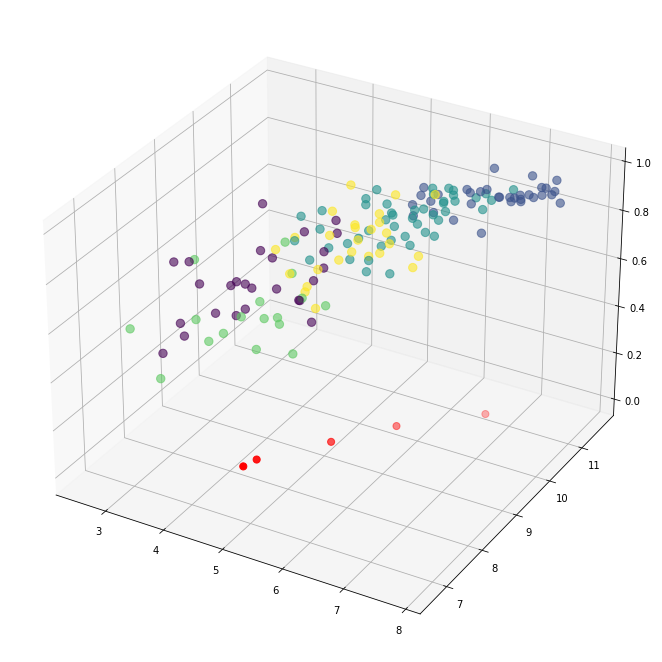

In [80]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
cb = ax.scatter(x[:,0],x[:,1],x[:,2], c=label,s=70, alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

#RANDOM FOREST

In [116]:
data.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,label_kmeans,Ladder score 2
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,3,0.0
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,0,0.0
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,0,0.0
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,0,0.0
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,3,0.0


In [82]:
data['Ladder score 2']=data['Ladder score']
data.loc[data['Ladder score 2'] < 6, 'Ladder score 2'] = 0
data.loc[data['Ladder score 2'] > 6, 'Ladder score 2'] = 1

In [121]:
data['Logged GDP per capita 2']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
144    0.0
145    0.0
146    0.0
147    0.0
148    0.0
Name: Logged GDP per capita 2, Length: 149, dtype: float64

In [117]:
data['Logged GDP per capita 2']=data['Logged GDP per capita']
data.loc[data['Logged GDP per capita 2'] < 10, 'Logged GDP per capita 2'] = 0
data.loc[data['Logged GDP per capita 2'] >= 10, 'Logged GDP per capita 2'] = 1


In [122]:
X_train, X_test, y_train, y_test = train_test_split(data, data['Logged GDP per capita 2'], test_size = 0.2, random_state=457)

In [123]:
y_train

56     0.0
2      1.0
81     0.0
145    0.0
144    0.0
      ... 
128    0.0
83     0.0
23     1.0
147    0.0
98     0.0
Name: Logged GDP per capita 2, Length: 119, dtype: float64

In [124]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini')

In [125]:
rf_fitted = rf.fit(X_train[features], y_train)

In [127]:
rf_fitted.score(X_test[features],y_test)

0.9333333333333333

In [109]:
rf_predicted = rf.predict(X_test[features])

In [128]:
rf.score(X_train[features],y_train)

1.0

#BOOSTING TREES

In [137]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=419).fit(X_train[features], y_train)

In [138]:
gb.score(X_test[features],y_test)

0.8666666666666667

#LDA

In [142]:
lda=LDA().fit(X_train[features], y_train)

In [143]:
lda.score(X_test[features],y_test)

0.9